<a href="https://colab.research.google.com/github/MohammadMahdi1375/ClassificationProblem_S3.2/blob/master/Deep%20Convolutional%20GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0 [Discriminator Loss : 1.5441505908966064]  [Generator Loss : 0.7116808891296387]
100 [Discriminator Loss : 0.27927809953689575]  [Generator Loss : 2.416978120803833]
200 [Discriminator Loss : 0.10937478393316269]  [Generator Loss : 6.0129780769348145]
300 [Discriminator Loss : 0.3208968937397003]  [Generator Loss : 4.053386688232422]
400 [Discriminator Loss : 0.08139847964048386]  [Generator Loss : 4.6436848640441895]
500 [Discriminator Loss : 0.7349145412445068]  [Generator Loss : 1.2823395729064941]
600 [Discriminator Loss : 0.07986970245838165]  [Generator Loss : 4.453821182250977]
700 [Discriminator Loss : 0.22571571171283722]  [Generator Loss : 2.7191014289855957]
800 [Discriminator Loss : 0.39867115020751953]  [Generator Loss : 3.6651837825775146]
900 [Discriminator Loss : 1.6709434986114502]  [Generator Loss : 1.8244259357452393]
1000 [Discriminator Loss : 0.600622296333313]  [Generator Loss : 4.4540205001831055]
1100 [Discriminator Loss : 0.3110630512237549]  [Generator Loss 

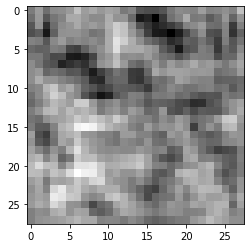

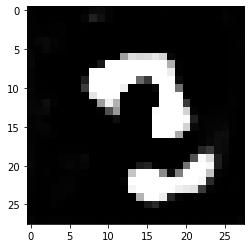

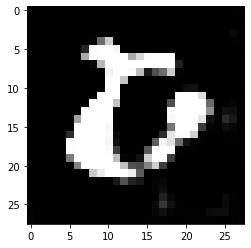

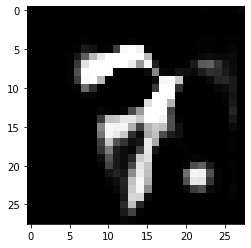

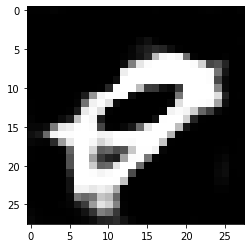

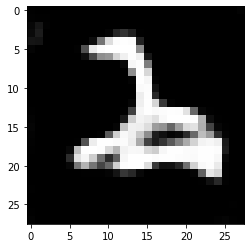

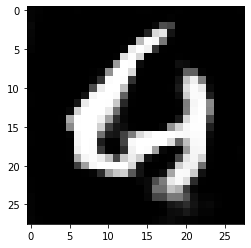

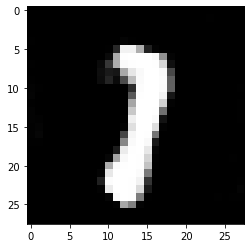

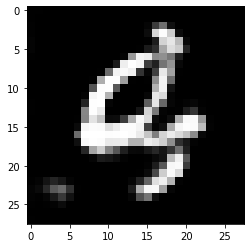

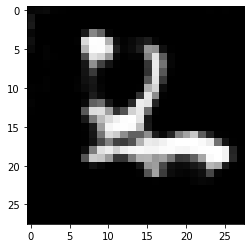

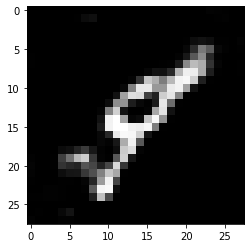

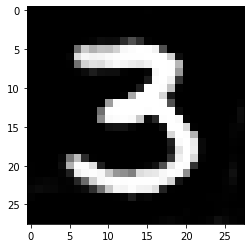

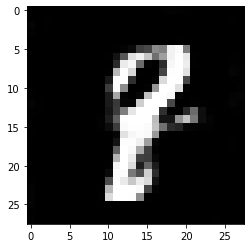

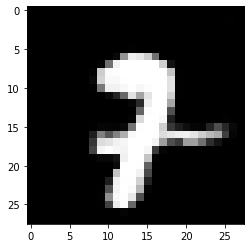

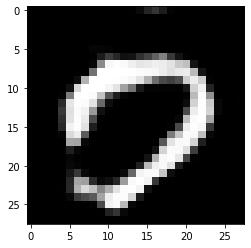

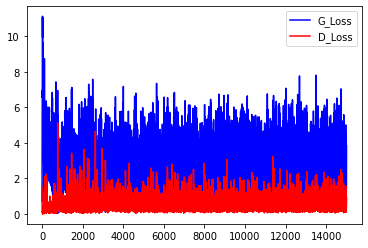

Time elapsed in Second : 1251.0506184101105
1588275442.033515


In [2]:
%tensorflow_version 2.x
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


class DCGAN():
  ###################################################################################################################################
  ########################################################### Constructor ###########################################################
  ###################################################################################################################################
  def __init__(self, batch_size):

    ################################################ Dimensions of the Images and Latent #############################################
    self.H = 28
    self.W = 28
    self.channels = 1
    self.latent_dim = 100
    self.batch_size = batch_size


    #################################################### Loading MNIST Data set #####################################################
    (self.training_input, _), (_, _) = tf.keras.datasets.mnist.load_data()
    self.training_input = self.training_input/127.5 - 1
    self.training_input = np.expand_dims(self.training_input, axis=3)
    """
    self.training_set = tf.data.Dataset.from_tensor_slices(self.training_input).shuffle(self.training_input.shape[0]).batch(self.batch_size)
    print("---------------------------------------------------------------------")
    print(f"Number of batchaes : {len(list(self.training_set.as_numpy_iterator()))}")
    print(f"Size of each batch which is consist of batch_size 28*28 image : {(list(self.training_set.as_numpy_iterator())[0]).shape}")
    print(f"Size of each images in batch : {(list(self.training_set.as_numpy_iterator())[0])[0].shape}")
    print("---------------------------------------------------------------------")
    """

    ##################################################### Making DCGAN Network ######################################################
    self.Discriminator = self.discriminator_network()
    self.Discriminator_Optimizer = tf.optimizers.Adam(1e-3)

    self.Generator = self.generator_network()
    self.Generator_Optimizer = tf.optimizers.Adam(1e-4)




  ###################################################################################################################################
  ############################################################ Generator ############################################################
  ###################################################################################################################################
  def generator_network(self):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(7*7*256, activation='relu', input_dim=self.latent_dim))
    model.add(tf.keras.layers.Reshape((7,7,256)))
    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2D(128, kernel_size=3, padding='same'))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.Conv2D(filters=self.channels, kernel_size=3, padding='same'))
    model.add(tf.keras.layers.Activation("tanh"))

    """
    model.add(tf.keras.layers.Dense(units=7*7256, input_shape=(self.latent_dim,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Reshape((7,7,256)))
    model.add(tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=3, padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=(2,2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=(2,2), padding='same'))
    """

    return model



  ###################################################################################################################################
  ########################################################## Discriminator ##########################################################
  ###################################################################################################################################
  def discriminator_network(self):
    model = tf.keras.Sequential()
    """
    model.add(tf.keras.layers.Conv2D(filters=7, kernel_size=(3,3), padding="same", input_shape=(self.H, self.W, self.channels)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dense(units=50, activation="relu"))
    model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
    """

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,strides=2 , padding='same', input_shape=(self.H, self.W, self.channels)))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(rate=0.25))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same'))
    model.add(tf.keras.layers.ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(rate=0.25))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=2, padding='same'))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(rate=0.25))
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=2, padding='same'))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(rate=0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


    return model



  ###################################################################################################################################
  ######################################################## GAN Cost Function ########################################################
  ###################################################################################################################################
  def get_GAN_loss(self, fake_prediction):
    #fake_prediction = tf.sigmoid(fake_prediction)
    fake_loss = tf.losses.binary_crossentropy(tf.ones_like(fake_prediction), fake_prediction)

    return fake_loss



  ###################################################################################################################################
  ################################################### Discriminator Cost Function ###################################################
  ###################################################################################################################################
  def get_discriminator_loss(self, real_prediction, fake_prediction):
    #real_prediction = tf.sigmoid(real_prediction)
    #fake_prediction = tf.sigmoid(fake_prediction)
    real_loss = tf.losses.binary_crossentropy(tf.ones_like(real_prediction), real_prediction)
    fake_loss = tf.losses.binary_crossentropy(tf.zeros_like(fake_prediction), fake_prediction)

    return real_loss + fake_loss



  ###################################################################################################################################
  ######################################################## Training Process #########################################################
  ###################################################################################################################################

  def train(self, epochs):

    d_loss = []
    g_loss = []
    iteration = []

    for epoch in range(epochs):
      
      index = np.random.randint(low=0, high=self.training_input.shape[0], size=self.batch_size)
      images = self.training_input[index]
      gen_input = np.random.normal(loc=0, scale=1, size=(self.batch_size, self.latent_dim))
      
      with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = self.Generator(gen_input, training=True)
        disc_output_real = self.Discriminator(images, training=True)
        disc_output_fake = self.Discriminator(gen_output, training=True)
      
        gen_loss = self.get_GAN_loss(disc_output_fake)
        disc_loss = self.get_discriminator_loss(disc_output_real, disc_output_fake)
        
        gradient_of_Generator = gen_tape.gradient(gen_loss, self.Generator.trainable_variables)
        gradient_of_Discriminator = disc_tape.gradient(disc_loss, self.Discriminator.trainable_variables)
        
        self.Generator_Optimizer.apply_gradients(zip(gradient_of_Generator, self.Generator.trainable_variables))
        self.Discriminator_Optimizer.apply_gradients(zip(gradient_of_Discriminator, self.Discriminator.trainable_variables))
        
        iteration.append(epoch)
        g_loss.append(np.mean(gen_loss))
        d_loss.append(np.mean(disc_loss))

        if (epoch % 100 == 0):
          print(f"{epoch} [Discriminator Loss : {np.mean(disc_loss)}]  [Generator Loss : {np.mean(gen_loss)}]")

        if (epoch % 1000 == 0):
          plt.figure()
          plt.imshow(tf.reshape(self.Generator(np.random.normal(loc=0, scale=1, size=(1, self.latent_dim))), (self.H, self.W)), cmap='gray')


    plt.figure(100)
    plt.plot(iteration, g_loss, 'b', label='G_Loss')
    plt.figure(100)
    plt.plot(iteration, d_loss, 'r', label='D_Loss')
    plt.legend()
    plt.show()


###################################################################################################################################
############################################################## MAIN ###############################################################
###################################################################################################################################
if __name__ == '__main__':
  start = time.time()
  obj = DCGAN(128)
  obj.train(15000)
  end = time.time()
  print(f"Time elapsed in Second : {end - start}")
  print(start)

